In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [1]:
import numpy as np

# Read the content of 't2.txt' into a NumPy array
with open('./data/university_adjacency.txt', 'r') as file:
    lines = file.read().splitlines()
data = [list(map(int, line.split())) for line in lines]
adjacency_matrix = np.array(data)

print(adjacency_matrix)


[[9 3 3 ... 4 4 4]
 [3 9 4 ... 0 2 4]
 [9 9 9 ... 9 9 9]
 ...
 [0 0 0 ... 9 0 3]
 [3 2 3 ... 9 9 9]
 [4 4 4 ... 3 0 9]]


In [53]:
for i in range(0,38):
    for j in range(0,38):
        if adjacency_matrix[i][j] <4 and adjacency_matrix[j][i] <4 and adjacency_matrix[i][j]!=0 and adjacency_matrix[j][i]!=0: #and not i==j:
            adjacency_matrix[i][j] =1
        else:
           adjacency_matrix[i][j] =0

print(adjacency_matrix)


[[0 1 0 ... 0 0 0]
 [1 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]


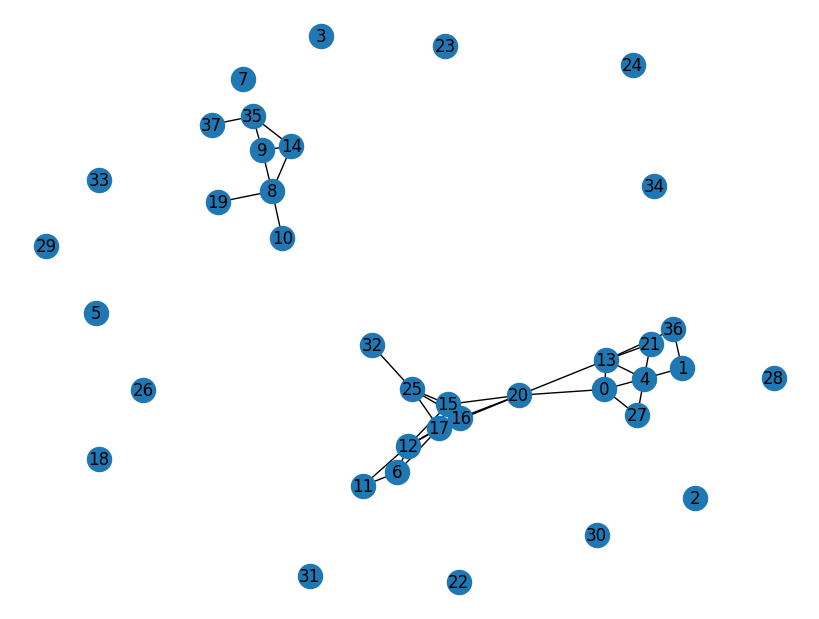

In [54]:
# Save the modified adjacency matrix to a new file
g = nx.from_numpy_array(adjacency_matrix)
pos=nx.spring_layout(g,k=0.3)
# np.savetxt('modifiedt2_matrix.txt', adjacency_matrix, delimiter=' ')
#nx.draw_networkx(g)
plt.figure(figsize=(8,6))
nx.draw(g,pos,with_labels = True)
plt.savefig('undirected')

In [55]:
print(nx.density(g)) # diventare amici, piu che conoscenza-> mating

0.051209103840682786


In [56]:
print(nx.transitivity(g))
print()

# core...

0.46601941747572817



In [57]:
import numpy as np
# Read the content of 'cov1.txt' into a NumPy array
with open('./data/university_metadata.txt', 'r') as file:
    lines = file.read().splitlines()
data = [list(map(int, line.split())) for line in lines]
adjacency_matrix2 = np.array(data)

print(adjacency_matrix2)

[[ 1  1  1  2  1 21 29 34 13  8 25 42 42 42 42 42 42 34  4  2  3]
 [ 2  1  1  0  2 24 28 36  7  2 22  2 29 36 36 23 32 28  4  2  2]
 [ 3  1  1  0  1 24 21 13 42 34 21 21 29 25 21 29 21 29  4  3  3]
 [ 4  1  2  0  2 30  6 21  0 32 21 21 38 36 17 21 21 35  4  3  3]
 [ 5  1  1  0  1 38 17 29 40 29 34  1 21  4 21 38  0 25  5  4  3]
 [ 6  1  2  0  1 18  4 21 10 26  5  0 38 14 10  5  2 32  3  2  2]
 [ 7  2  2  4  1 37  6 15 23 19 23 26 18 18 32 27  3  7  5  4  2]
 [ 8  2  1  5  4 36 21 21  2  2 21  0 25 21 42 34 27 32  4  3  2]
 [ 9  2  1  0  2 27 21  6  0  2 36  4 10 34 21 21 29 13  4  3  1]
 [10  2  1  0  2 27 30 18  0  0 13  6 19 21 38 22 34  6  5  4  5]
 [11  2  1  2  2 24 21 27 40 32  2  0 15  4 32 30 11  9  4  3  2]
 [12  2  2  5  1 38 34 29 17  4 13 25 25 21 38 34 25 34  4  2  2]
 [13  2  2  0  2 37 21 32 38  0 34  0 33 25 38 34  0 29  2  1  2]
 [14  1  1  0  1 32 21 27 36 36 21  3 36 21 24 34 31 27  5  3  2]
 [15  2  1  0  1 17 34 25 42 25 17  0 21  4 29 29  0 29  4  3  2]
 [16  2  2

In [58]:
matrix_meta = np.random.rand(38, 6)
for i in range(0,38):
    # Sex 1  (maschi 0, femmine 1)
    if adjacency_matrix2[i][1]== 2:
        matrix_meta[i][0] = 1
    elif adjacency_matrix2[i][1]== 1:
        matrix_meta[i][0] = 0
    # età 2 (18->0/22->1)
    if adjacency_matrix2[i][2] == 1:
        matrix_meta[i][1] = 0
    elif adjacency_matrix2[i][2] == 2:
        matrix_meta[i][1] = 1
    # Smoking 3 (1,2-> 0 no, resto si)
    if adjacency_matrix2[i][3] <= 2:
        matrix_meta[i][2] = 0
    if adjacency_matrix2[i][3] > 2:
        matrix_meta[i][2] = 1
    # Soft Drugs 4 (1,2 no, resto si)
    if adjacency_matrix2[i][4] <= 2:
        matrix_meta[i][3] = 0
    if adjacency_matrix2[i][4] > 2:
        matrix_meta[i][3] = 1
    # Religion 11  (1,20 ->0 no, 21,42->1 si)
    if adjacency_matrix2[i][11] <= 20:
        matrix_meta[i][4] = 0
    if adjacency_matrix2[i][11] > 20:
        matrix_meta[i][4] = 1
    # School Associations 16 (1,20->0 no, 21,42->1 si)
    if adjacency_matrix2[i][16] <= 20:
        matrix_meta[i][5] = 0
    if adjacency_matrix2[i][16] > 20:
        matrix_meta[i][5] = 1
matrix_meta=np.array(matrix_meta,dtype=int)
print(matrix_meta)

[[0 0 0 0 1 1]
 [0 0 0 0 0 1]
 [0 0 0 0 1 1]
 [0 1 0 0 1 1]
 [0 0 0 0 0 0]
 [0 1 0 0 0 0]
 [1 1 1 0 1 0]
 [1 0 1 1 0 1]
 [1 0 0 0 0 1]
 [1 0 0 0 0 1]
 [1 0 0 0 0 0]
 [1 1 1 0 1 1]
 [1 1 0 0 0 0]
 [0 0 0 0 0 1]
 [1 0 0 0 0 0]
 [1 1 0 0 1 0]
 [1 1 0 0 0 0]
 [1 1 0 0 1 0]
 [1 0 1 1 0 0]
 [1 1 0 0 0 1]
 [0 1 1 0 0 0]
 [0 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 1 1 0 0]
 [1 0 1 1 1 0]
 [1 1 0 0 0 0]
 [1 0 0 0 1 0]
 [0 0 0 0 0 0]
 [0 0 1 1 0 0]
 [1 0 0 0 1 0]
 [1 1 1 0 0 0]
 [0 0 1 1 0 1]
 [1 1 1 0 0 1]
 [1 1 0 0 0 0]
 [1 1 1 0 1 1]
 [1 0 0 0 0 0]
 [1 0 1 1 0 0]
 [0 0 0 0 0 0]]


In [59]:
np.savetxt('./data/university_bin_meta.txt',matrix_meta,fmt='%.1d')

In [60]:
# Read the attributes from an input file
input_file = './data/university_bin_meta.txt'
node_id = 0

node_attributes = []

with open(input_file, 'r') as file:
    for line in file:
        parts = line.strip().split()
        if len(parts) == 6:
            sex, age,smoking,drugs, religion,school = int(parts[0]), int(parts[1]), int(parts[2]), int(parts[3]), int(parts[4]),int(parts[5])
            node_attributes.append({'sex': sex, 'age': age, 'smoking': smoking,'drugs':drugs, 'religion': religion,'school':school})

# Set the attributes for nodes in the graph
node_ids = list(g.nodes)  # Assuming node IDs correspond to node order in the input file

for i, node_id in enumerate(node_ids):
    attributes = node_attributes[i]
    nx.set_node_attributes(g, {node_id: attributes})

# Example: Print attributes for a specific node (e.g., node with ID 1)
node_id = 0
attributes = g.nodes[node_id]
print(attributes)
print(f"Node {node_id} attributes - Sex: {attributes['sex']}, Age: {attributes['age']}, smoking: {attributes['smoking']}, drugs: {attributes['drugs']},Religion: {attributes['religion']},school: {attributes['school']}")

{'sex': 0, 'age': 0, 'smoking': 0, 'drugs': 0, 'religion': 1, 'school': 1}
Node 0 attributes - Sex: 0, Age: 0, smoking: 0, drugs: 0,Religion: 1,school: 1


In [61]:
matrix_meta[20][:]

array([0, 1, 1, 0, 0, 0])

In [62]:
dict = nx.degree_centrality(g)
dict

{0: 0.10810810810810811,
 1: 0.05405405405405406,
 2: 0.0,
 3: 0.0,
 4: 0.08108108108108109,
 5: 0.0,
 6: 0.08108108108108109,
 7: 0.0,
 8: 0.10810810810810811,
 9: 0.08108108108108109,
 10: 0.02702702702702703,
 11: 0.05405405405405406,
 12: 0.13513513513513514,
 13: 0.13513513513513514,
 14: 0.08108108108108109,
 15: 0.13513513513513514,
 16: 0.13513513513513514,
 17: 0.16216216216216217,
 18: 0.0,
 19: 0.02702702702702703,
 20: 0.13513513513513514,
 21: 0.05405405405405406,
 22: 0.0,
 23: 0.0,
 24: 0.0,
 25: 0.10810810810810811,
 26: 0.0,
 27: 0.05405405405405406,
 28: 0.0,
 29: 0.0,
 30: 0.0,
 31: 0.0,
 32: 0.02702702702702703,
 33: 0.0,
 34: 0.0,
 35: 0.08108108108108109,
 36: 0.05405405405405406,
 37: 0.02702702702702703}

In [63]:
max_value = max(dict.values())
print(max_value)
#max_keys = [v for v, in dict.items() if v == max]
#print(max_keys)

0.16216216216216217


In [64]:
max_keys = [k for k, v in dict.items() if v == max]
print(max_keys) ## ----> KEY 17

[]


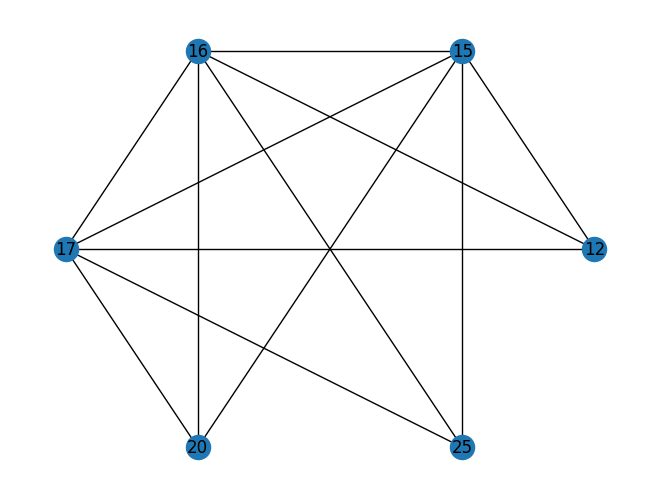

In [65]:
K = nx.k_core(g, k = 3)
nx.draw_circular(K,with_labels = True)

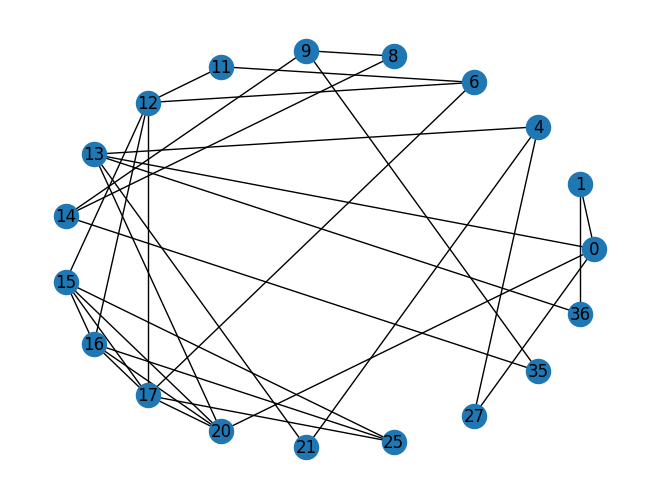

In [66]:
K = nx.k_core(g, k = 2)
nx.draw_circular(K,with_labels = True) ## ---> k = 3

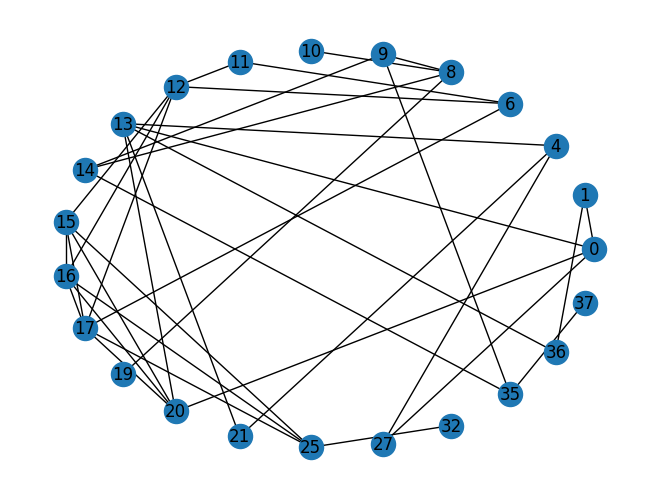

In [67]:
K = nx.k_core(g, k = 1)
nx.draw_circular(K,with_labels = True) ## ---> k = 1 TUTTI MENO QUELLI CHE HANNO LASCIATO

In [68]:
# Converte i valori in interi
for i in range(len(matrix_meta)):
    for j in range(len(matrix_meta[i])):
        matrix_meta[i][j] = int(matrix_meta[i][j])
# Apri il file in modalità di scrittura
with open("meta2.txt", "w") as file:
    # Scrittura della matrice nel file
    for row in matrix_meta:
        file.write("\t".join(map(str, row)) + "\n")


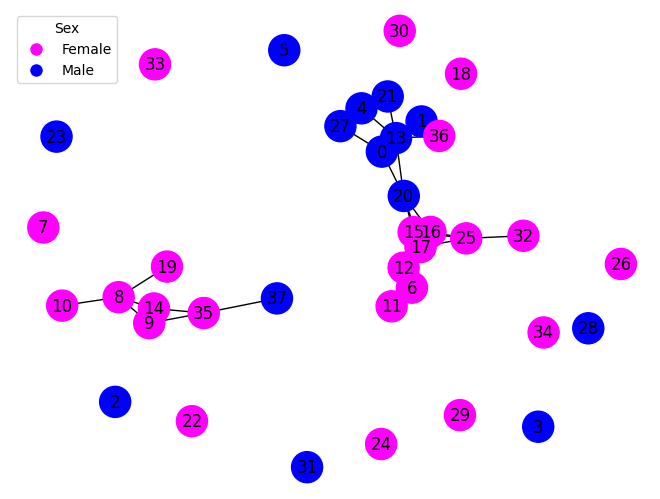

<Figure size 640x480 with 0 Axes>

In [69]:
# Create a mapping of 'sex' attribute values to colors
color_map = {1: 'magenta', 0: 'blue'}
color_legend = {1: 'Female', 0: 'Male'}

# Extract the 'sex' attribute for each node and assign a color based on the attribute
node_colors = [color_map[g.nodes[node]['sex']] for node in g.nodes()]

# Draw the graph with node colors
pos = nx.spring_layout(g,k=0.3)  # You can choose a different layout if desired
nx.draw(g, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=12)

# Create a custom legend
legend_labels = {v: k for k, v in color_legend.items()}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[legend_labels[label]], markersize=10, label=label) for label in color_legend.values()]
plt.legend(handles=legend_handles, title='Sex', loc='upper left')

plt.show()
plt.savefig('sex_feature')

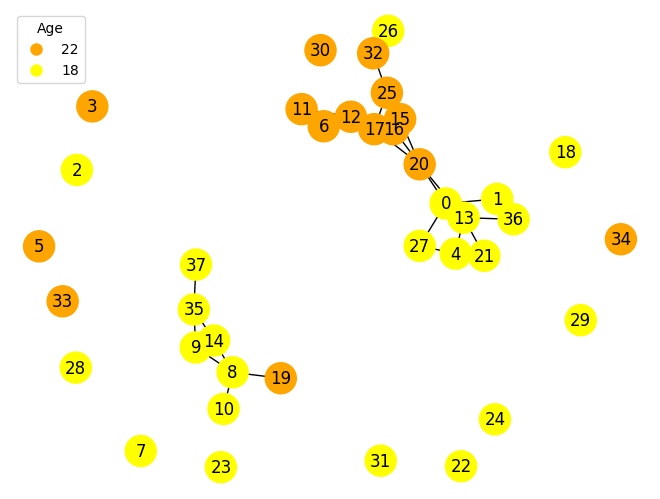

<Figure size 640x480 with 0 Axes>

In [93]:
# Create a mapping of 'sex' attribute values to colors
color_map = {1: 'orange', 0: 'yellow'}
color_legend = {1: '22', 0: '18'}

# Extract the 'sex' attribute for each node and assign a color based on the attribute
node_colors = [color_map[g.nodes[node]['age']] for node in g.nodes()]

# Draw the graph with node colors
pos = nx.spring_layout(g,k=0.3)  # You can choose a different layout if desired
nx.draw(g, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=12)

# Create a custom legend
legend_labels = {v: k for k, v in color_legend.items()}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[legend_labels[label]], markersize=10, label=label) for label in color_legend.values()]
plt.legend(handles=legend_handles, title='Age', loc='upper left')

plt.show()
plt.savefig('age_feature')

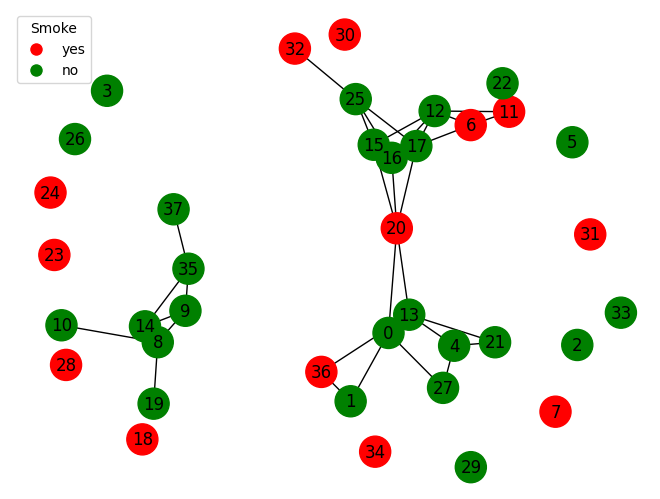

In [71]:
# Create a mapping of 'sex' attribute values to colors
color_map = {1: 'red', 0: 'green'}
color_legend = {1: 'yes', 0: 'no'}

# Extract the 'sex' attribute for each node and assign a color based on the attribute
node_colors = [color_map[g.nodes[node]['smoking']] for node in g.nodes()]

# Draw the graph with node colors
pos = nx.spring_layout(g,k=0.5)  # You can choose a different layout if desired
nx.draw(g, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=12)

# Create a custom legend
legend_labels = {v: k for k, v in color_legend.items()}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[legend_labels[label]], markersize=10, label=label) for label in color_legend.values()]
plt.legend(handles=legend_handles, title='Smoke', loc='upper left')

plt.show()

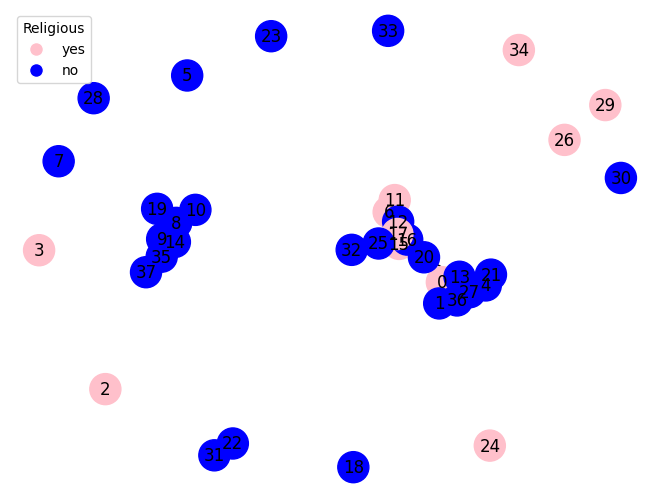

In [72]:
# Create a mapping of 'sex' attribute values to colors
color_map = {1: 'pink', 0: 'blue'}
color_legend = {1: 'yes', 0: 'no'}

# Extract the 'sex' attribute for each node and assign a color based on the attribute
node_colors = [color_map[g.nodes[node]['religion']] for node in g.nodes()]

# Draw the graph with node colors
pos = nx.spring_layout(g)  # You can choose a different layout if desired
nx.draw(g, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=12)

# Create a custom legend
legend_labels = {v: k for k, v in color_legend.items()}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[legend_labels[label]], markersize=10, label=label) for label in color_legend.values()]
plt.legend(handles=legend_handles, title='Religious', loc='upper left')

plt.show()

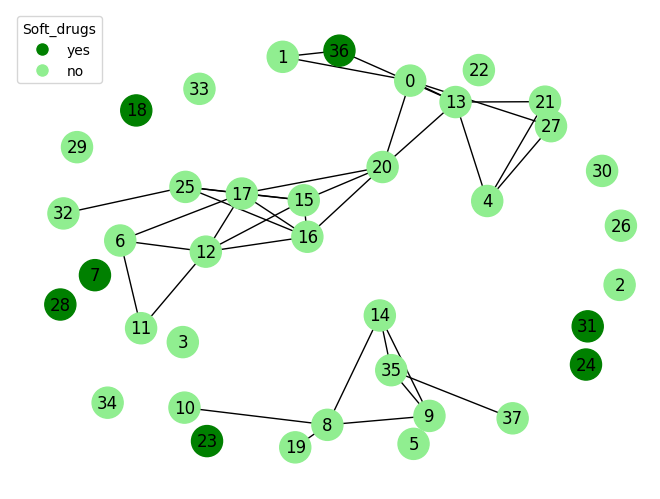

<Figure size 640x480 with 0 Axes>

In [94]:
# Create a mapping of 'sex' attribute values to colors
color_map = {1: 'green', 0: 'lightgreen'}
color_legend = {1: 'yes', 0: 'no'}

# Extract the 'sex' attribute for each node and assign a color based on the attribute
node_colors = [color_map[g.nodes[node]['drugs']] for node in g.nodes()]

# Draw the graph with node colors
pos = nx.spring_layout(g, k=0.8)  # You can choose a different layout if desired
nx.draw(g, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=12)

# Create a custom legend
legend_labels = {v: k for k, v in color_legend.items()}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[legend_labels[label]], markersize=10, label=label) for label in color_legend.values()]
plt.legend(handles=legend_handles, title='Soft_drugs', loc='upper left')

plt.show()
plt.savefig('drugs_features')

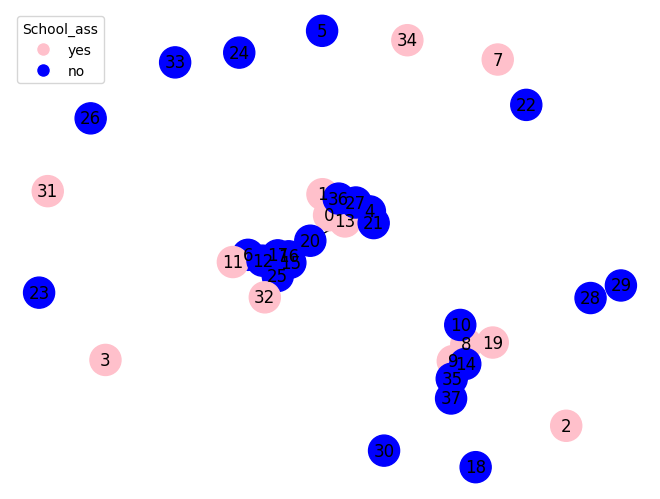

In [74]:
# Create a mapping of 'sex' attribute values to colors
color_map = {1: 'pink', 0: 'blue'}
color_legend = {1: 'yes', 0: 'no'}

# Extract the 'sex' attribute for each node and assign a color based on the attribute
node_colors = [color_map[g.nodes[node]['school']] for node in g.nodes()]

# Draw the graph with node colors
pos = nx.spring_layout(g)  # You can choose a different layout if desired
nx.draw(g, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=12)

# Create a custom legend
legend_labels = {v: k for k, v in color_legend.items()}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[legend_labels[label]], markersize=10, label=label) for label in color_legend.values()]
plt.legend(handles=legend_handles, title='School_ass', loc='upper left')

plt.show()

In [75]:
# Function to calculate homophily for a given attribute (e.g., 'gender')
def calculate_homophily(graph, attribute):
    same_count = 0
    total_count = 0

    for u, v in graph.edges():
        if graph.nodes[u][attribute] == graph.nodes[v][attribute]:
            same_count += 1
        total_count += 1

    if total_count > 0:
        homophily = same_count / total_count
    else:
        homophily = 0.0

    return homophily

# Calculate homophily for the 'gender' attribute
attribute_name = 'drugs'
homophily_value = calculate_homophily(g, attribute_name)

print(f'Homophily for {attribute_name}: {homophily_value}')

Homophily for drugs: 0.9444444444444444


Homophily for drugs: 0.9444444444444444
VERY HIGH
this because only one student in our dataset uses soft_drugs
so this features is not very reliable.

Homophily for sex: 0.8333333333333334
In this case this value in important because we have a good distrubion of male/female
so this measure is telling us that being of the same sex is important to create friendships

Homophily for age: 0.9166666666666666
Age is even more important

Homophily for smoking: 0.6944444444444444
smoke not so important


Homophily for religion: 0.6111111111111112
same


Homophily for school: 0.6111111111111112
same

In [76]:
import numpy as np

# Read the content of 't2.txt' into a NumPy array
with open('t3.txt', 'r') as file:
    lines = file.read().splitlines()
data = [list(map(int, line.split())) for line in lines]
adjacency_matrix2 = np.array(data)


In [77]:
# FALSITà _>DIRECTED GRAPH

for i in range(0,38):
    for j in range(0,38):
        if adjacency_matrix2[i][j] <4 and adjacency_matrix2[i][j]!=0: #and not i==j:
            adjacency_matrix2[i][j] =1
        else:
           adjacency_matrix2[i][j] =0



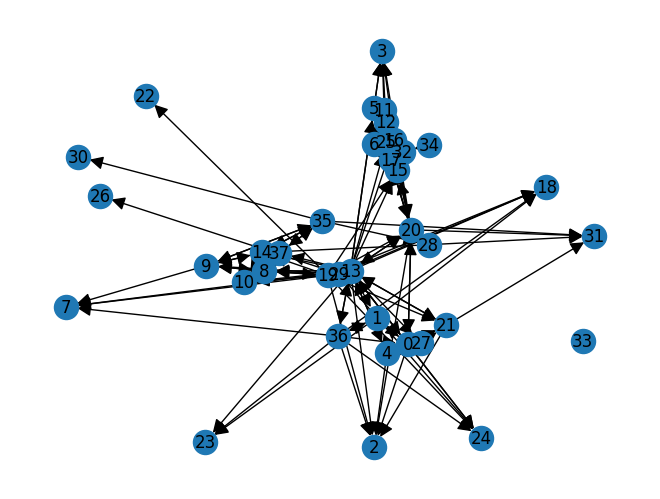

In [78]:
# Save the modified adjacency matrix to a new file
#gD = nx.from_numpy_array(adjacency_matrix2)
# np.savetxt('modifiedt2_matrix.txt', adjacency_matrix, delimiter=' ')
#nx.draw_networkx(g)

gD = nx.DiGraph(adjacency_matrix2)
nx.draw(gD,with_labels = True, arrows = True, arrowstyle = '-|>', arrowsize = 20)

In [79]:
dict2 = nx.degree_centrality(gD)

In [80]:
max_value = max(dict2.values())
print(max_value)

0.7027027027027027


In [81]:
dict2

{0: 0.35135135135135137,
 1: 0.1891891891891892,
 2: 0.1891891891891892,
 3: 0.16216216216216217,
 4: 0.21621621621621623,
 5: 0.21621621621621623,
 6: 0.16216216216216217,
 7: 0.10810810810810811,
 8: 0.2972972972972973,
 9: 0.21621621621621623,
 10: 0.16216216216216217,
 11: 0.1891891891891892,
 12: 0.35135135135135137,
 13: 0.7027027027027027,
 14: 0.2972972972972973,
 15: 0.35135135135135137,
 16: 0.3783783783783784,
 17: 0.3783783783783784,
 18: 0.13513513513513514,
 19: 0.32432432432432434,
 20: 0.40540540540540543,
 21: 0.24324324324324326,
 22: 0.02702702702702703,
 23: 0.08108108108108109,
 24: 0.13513513513513514,
 25: 0.2972972972972973,
 26: 0.02702702702702703,
 27: 0.16216216216216217,
 28: 0.08108108108108109,
 29: 0.13513513513513514,
 30: 0.02702702702702703,
 31: 0.10810810810810811,
 32: 0.13513513513513514,
 33: 0.0,
 34: 0.02702702702702703,
 35: 0.24324324324324326,
 36: 0.2702702702702703,
 37: 0.16216216216216217}

In [82]:
matrix_meta[13][:]

array([0, 0, 0, 0, 0, 1])

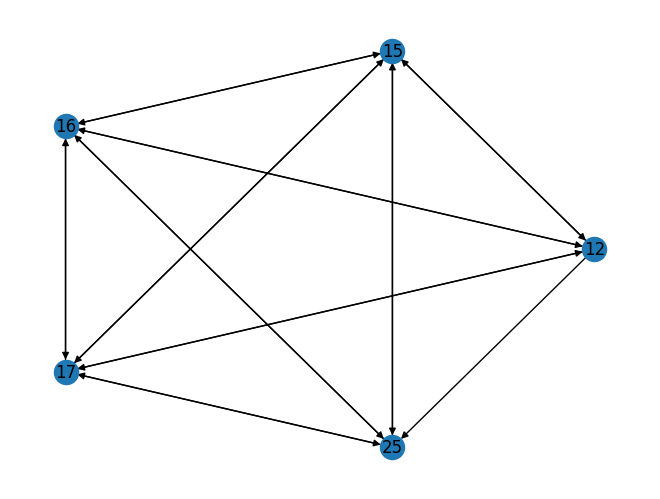

In [83]:
K2 = nx.k_core(gD, k = None)
nx.draw_circular(K2,with_labels = True) # GRUPPO PIU MASCHIO

# IN_degree analysis

In [84]:
# IN DEGREE
dict3 = nx.in_degree_centrality(gD)
print(max(dict3.values()))
max(dict3, key=dict3.get)

0.21621621621621623


15

In [85]:
import statistics

# Calculating the mean of the dictionary values
non_z=[v for v in dict3.values() if v!=0]  #tolgo gli zeri per non compromettere il calcolo
mean_value = statistics.mean(non_z)

print(mean_value)

0.11351351351351352


# OUT_degree analysis

In [86]:
dict4 =nx.out_degree_centrality(gD)

print(max(dict4.values()))
max(dict4, key=dict4.get)

0.5675675675675675


13

In [87]:
import statistics

# Calculating the mean of the dictionary values
non_z=[v for v in dict4.values() if v!=0] #tolgo gli zeri per non compromettere il calcolo
mean_value = statistics.mean(non_z)
print(mean_value)

0.14714714714714716


the node with the highest outer degree is involved in a school association, magari è tipo il rappresentate degli studenti e per questo ha più contatti
on the other hand they have a very low in degree centrality

the one with the highest in_degree is 15 and [1 1 0 0 1 0]

# betweenness

In [88]:
nx.betweenness_centrality(gD)

{0: 0.04690106773440107,
 1: 0.0016891891891891893,
 2: 0.0,
 3: 0.0,
 4: 0.00782449115782449,
 5: 0.0005630630630630631,
 6: 0.0010447947947947948,
 7: 0.0,
 8: 0.16504004004004005,
 9: 0.018080580580580582,
 10: 0.0,
 11: 0.0006256256256256255,
 12: 0.024972293722293714,
 13: 0.2468486343486344,
 14: 0.062499999999999986,
 15: 0.07856815148481816,
 16: 0.04349557891224558,
 17: 0.06599039515706184,
 18: 0.0,
 19: 0.1510885885885886,
 20: 0.21740490490490494,
 21: 0.03234901568234902,
 22: 0.0,
 23: 0.0,
 24: 0.0,
 25: 0.02010939510939511,
 26: 0.0,
 27: 0.0004379379379379379,
 28: 0.0,
 29: 0.0,
 30: 0.0,
 31: 0.0,
 32: 0.024774774774774775,
 33: 0.0,
 34: 0.0,
 35: 0.045733233233233236,
 36: 0.007972257972257972,
 37: 0.025775775775775778}

# Transitivity

In [89]:
nx.transitivity(g)

0.46601941747572817

QUESTO valore rispecchia un po' il fatto che ci siano dei grupetti collegati da singoli

# Reciprocity

In [90]:
nx.reciprocity(gD)

0.4897959183673469

da questo possiamo capire che la gente è 'falsa' , almeno la metà dei collegamenti sono unilaterali

- PARAGONE DEI CLUSTER SEX (calcoliamo anche la homophily)
- RELIGION binaria (calcoliamo la homophily) -> risultato: è inutile
- DELINQUENCY, ALCOHOL, SMOKING e DRUGS. teniamo separato e li commentiamo uno per uno?
- indegree e outdegree, guardiamo le caratteristiche di quelli più popolari
- visualizzazione a cipolla dei k-core

- reciprocity
- transitivity
- clustering coefficient?

In [91]:
cluster_coeff=nx.clustering(g)
print(cluster_coeff)


{0: 0.16666666666666666, 1: 0, 2: 0, 3: 0, 4: 0.3333333333333333, 5: 0, 6: 0.6666666666666666, 7: 0, 8: 0.16666666666666666, 9: 0.6666666666666666, 10: 0, 11: 1.0, 12: 0.5, 13: 0.2, 14: 0.6666666666666666, 15: 0.7, 16: 0.7, 17: 0.5333333333333333, 18: 0, 19: 0, 20: 0.4, 21: 1.0, 22: 0, 23: 0, 24: 0, 25: 0.5, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0.3333333333333333, 36: 0, 37: 0}


cosa ci dice????


[2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 1, 2, 3, 2, 2, 3, 3, 3, 0, 1, 3, 2, 0, 0, 0, 3, 0, 2, 0, 0, 0, 0, 1, 0, 0, 2, 2, 1]


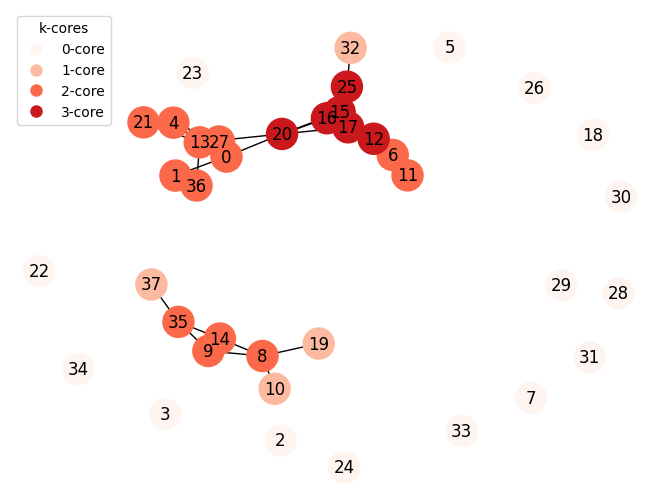

In [92]:


G_1_core = nx.k_core(g, k= 1)
G_2_core = nx.k_core(g, k= 2)
G_3_core = nx.k_core(g, k= 3)

k_mask = []
for i in g.nodes():
  if i in G_3_core.nodes():
    k_mask.append(3)
  elif i in G_2_core.nodes():
    k_mask.append(2)
  elif i in G_1_core.nodes():
    k_mask.append(1)
  else:
    k_mask.append(0)
print(k_mask)

from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

cmap = plt.get_cmap('Reds')
norm = Normalize(vmin=0, vmax=4)
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Create a mapping of 'alcohol' attribute values to colors
color_legend = {0: '0-core', 1: '1-core', 2: '2-core', 3: '3-core'}

# Extract the 'sex' attribute for each node and assign a color based on the attribute
node_colors = [cmap(norm(k)) for k in k_mask]

# Draw the graph with node colors
pos = nx.spring_layout(g, k=0.3)  # You can choose a different layout if desired
nx.draw(g, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=12)

# Create a custom legend
legend_labels = {v: k for k, v in color_legend.items()}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(norm(legend_labels[label])), markersize=10, label=label) for label in color_legend.values()]

plt.legend(handles=legend_handles, title='k-cores', loc='upper left')

plt.show()